# **Census Income Project**

Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight) The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
# Importing necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Collection and Preprocessing**

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
# checking teh shape of the dataset.
data.shape

(32560, 15)

The datasetcontains 32560 rows and 15 columns in total


In [7]:
# Checking the total column names in dataset.
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
# Checking the datset summary()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The dataset contains 6 integer columns and 9 object datatype column.

In [9]:
# Checking the character value '?' in dataset.

round((data.isin(['?']).sum() / data.shape[0])
      * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
dtype: object

In [10]:
# Checking the null values in the dataset.

data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

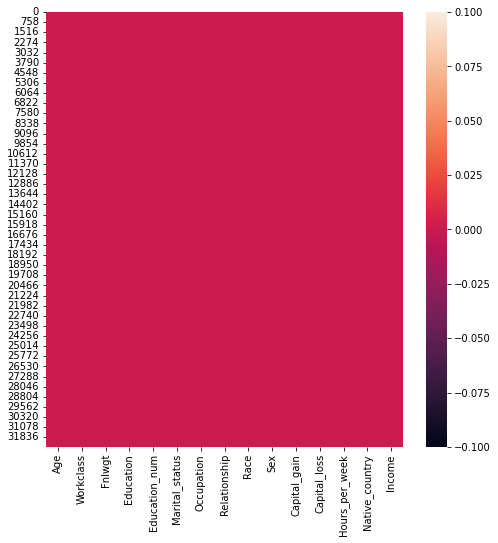

In [11]:
# Visualizing the null values using heatmap.

plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

We can clearly see that the dataset doesn't contain any null/missing value.

In [12]:
# Checking the statistical summary of the dataset.

data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From the above statistics, the total count is 32560, mean,std., min,25%, 75%, 50%, max values have very much difference in them.

In [13]:
# Checking the value count of the target column Income.

Income = data['Income'].value_counts(normalize=True)
round(Income*100).astype('str') +'%'

 <=50K    76.0%
 >50K     24.0%
Name: Income, dtype: object

From this we can conclude that our dataset is imbalanced.

# **Exploratory Data Analysis(EDA)**

## **Univariate Analysis**

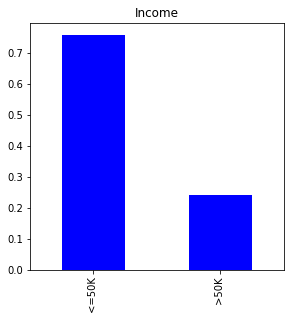

In [14]:
# Visualizing Target column using bar plot.

plt.figure(1)
plt.subplot(222)
plt.title('Income Distribution')
data["Income"].value_counts(normalize='True').plot.bar(figsize=(10,10),title="Income",color=["blue"])

Maximum distribution of Income lies in <=50k

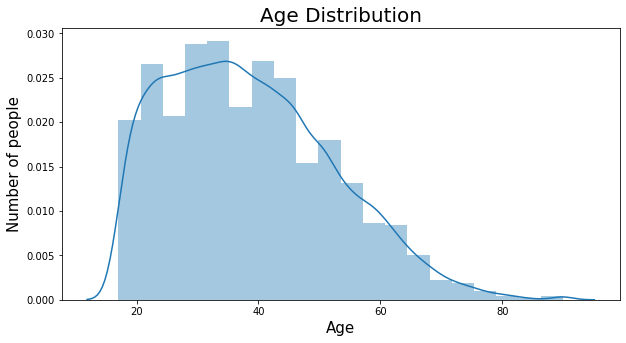

In [15]:
import warnings
warnings.filterwarnings('ignore')

# Visualizing Age column using dist plot
plt.figure(figsize=(10, 5))
sns.distplot(data['Age'], bins=20)
plt.title('Age Distribution', fontdict={'fontsize': 20})
plt.xlabel('Age',fontdict={'fontsize': 15})
plt.ylabel('Number of people',fontdict={'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

We can see the age column possessing normal distribution

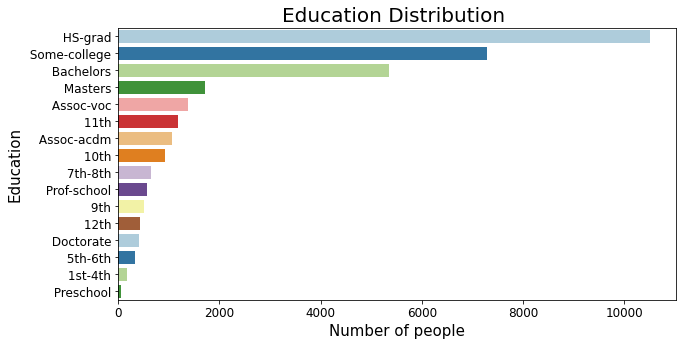

In [16]:
# visualizing the  Education column using bar plot.

Edu = data['Education'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(Edu.values, Edu.index, palette='Paired')
plt.title('Education Distribution ', fontdict={'fontsize': 20})
plt.xlabel('Number of people', fontdict={'fontsize': 15})
plt.ylabel('Education', fontdict={ 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Education type HS-grad has maximum no. of people.

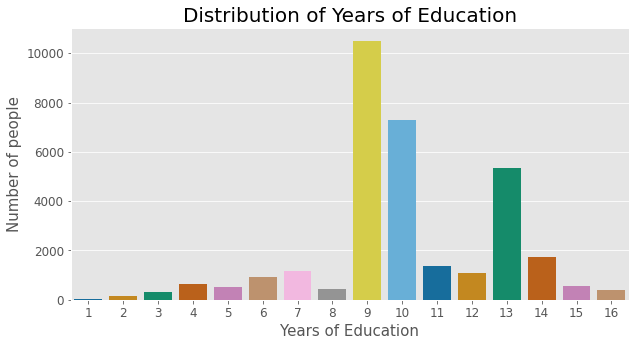

In [17]:
# Visualizing Education_num column using bar plot.

Edu_num=data['Education_num'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(Edu_num.index, Edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={'fontsize': 20})
plt.xlabel('Years of Education', fontdict={'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Most no. of people are in year 9 then in 10 and then 13,least no. of people are in year 2.

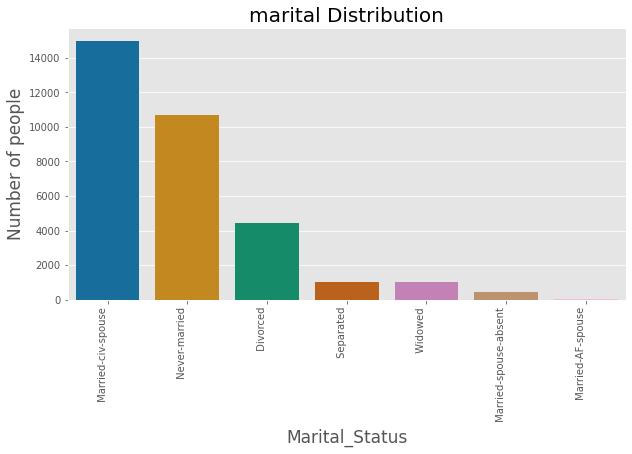

In [18]:
# Visualizing Marital_status column using bar plot.


marital = data['Marital_status'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(marital.index, marital.values, palette='colorblind')
plt.title('marital Distribution', fontdict={'fontsize': 20})
plt.xlabel('Marital_Status', fontdict={'fontsize': 17})
plt.ylabel('Number of people', fontdict={'fontsize': 17})
plt.xticks(rotation=90,ha='right')
plt.show()

The marital distribution shows most of people are included in Married-civ-spouse type,after that some people are not married and so on,Married-AF-spouse has almost o distribution.

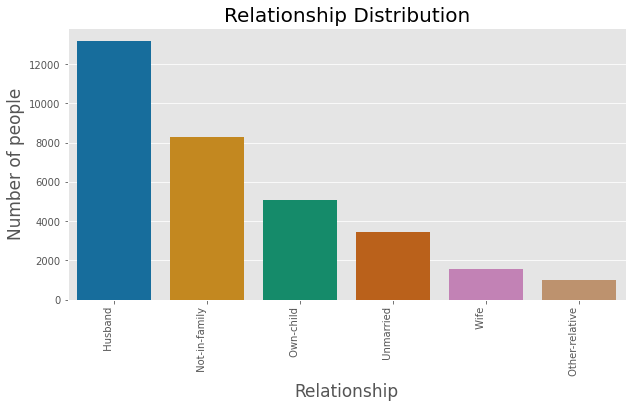

In [19]:
# Visualizing the Relationship column using bar plot.

rela = data['Relationship'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(rela.index, rela.values, palette='colorblind')
plt.title('Relationship Distribution', fontdict={'fontsize': 20})
plt.xlabel('Relationship', fontdict={'fontsize': 17})
plt.ylabel('Number of people', fontdict={'fontsize': 17})
plt.xticks(rotation=90,ha='right')
plt.show()

Most of the people are included in Husband type of relationship column.

And the least no. of people are included in Other-relative type of relationship column.

 Male      21789
 Female    10771
Name: Sex, dtype: int64


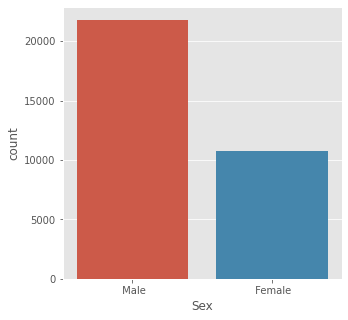

In [20]:
# Visualizing the Sex column using countplot.

print(data['Sex'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(data['Sex'])
plt.show()

Here no. of Male are greater than no. of Female

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


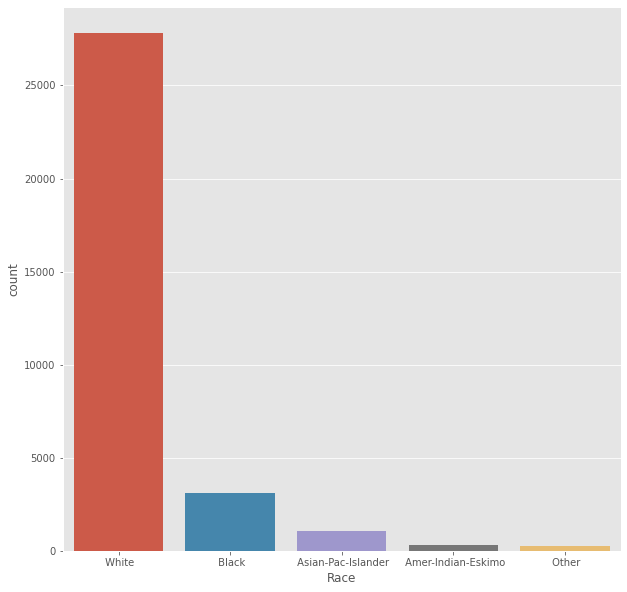

In [21]:
# Visualizing the Race column using countplot.

print(data['Race'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(data['Race'])
plt.show()

Race column with type 'White' has maximum count.

And Race column with type 'Other'has least value count

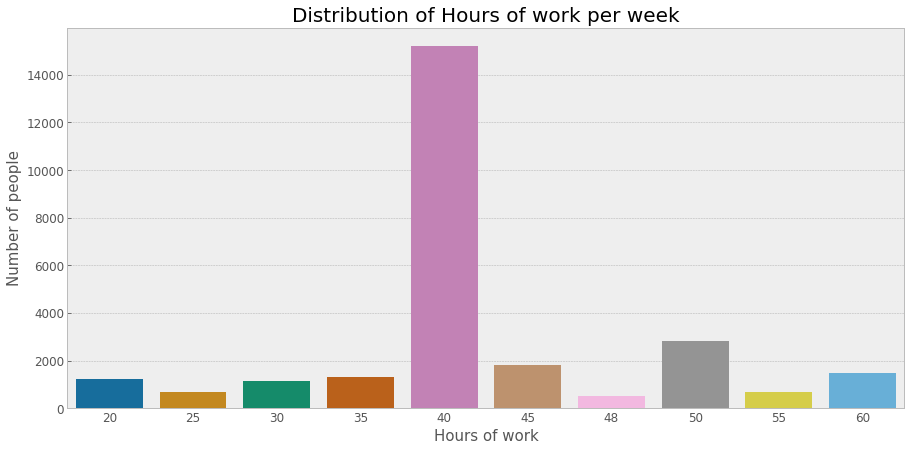

In [22]:
# Visualizing Hours_per_week column using countplot.

hours = data['Hours_per_week'].value_counts().head(10)
plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={'fontsize': 20})
plt.xlabel('Hours of work', fontdict={'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

No. of people works maximum 40 hours and minimum 48 hours per week.

## **Bivariate Analysis**

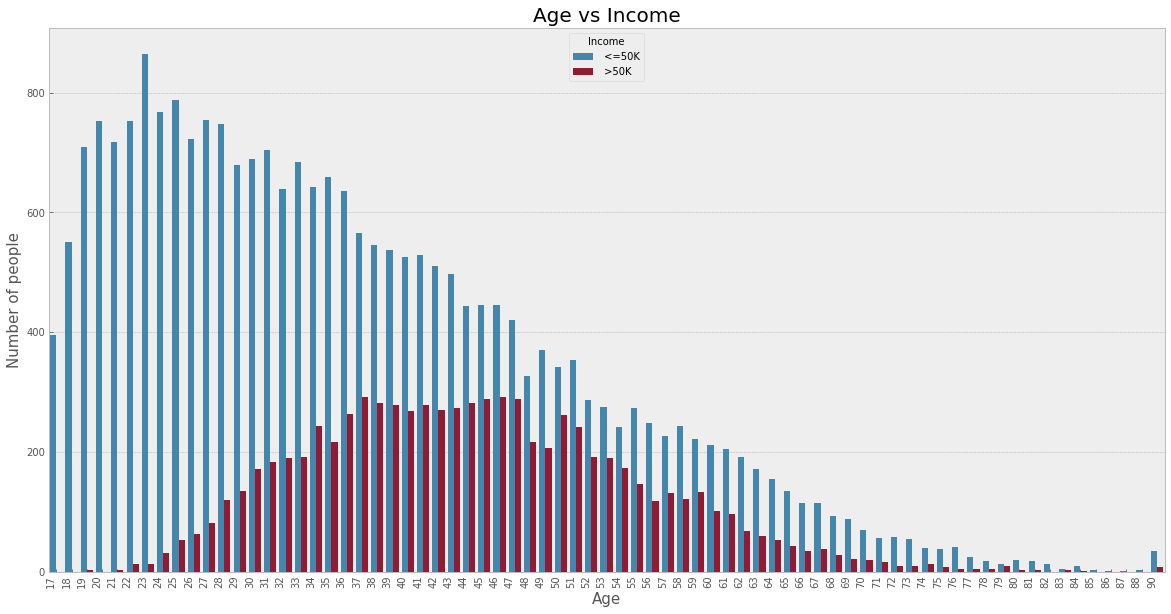

In [23]:
# Visualizing Age vs Income using count plot.

plt.figure(figsize=(20,10))
plt.title('Age vs Income',fontdict={'fontsize': 20})
plt.xticks(rotation=90,ha='right')
sns.countplot(x ='Age', hue = "Income", data = data)
plt.xlabel('Age', fontdict={'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontsize':15})
plt.show()
 

Most no. of people lies in age group 27 and least no. of people lies in between 77 to 90

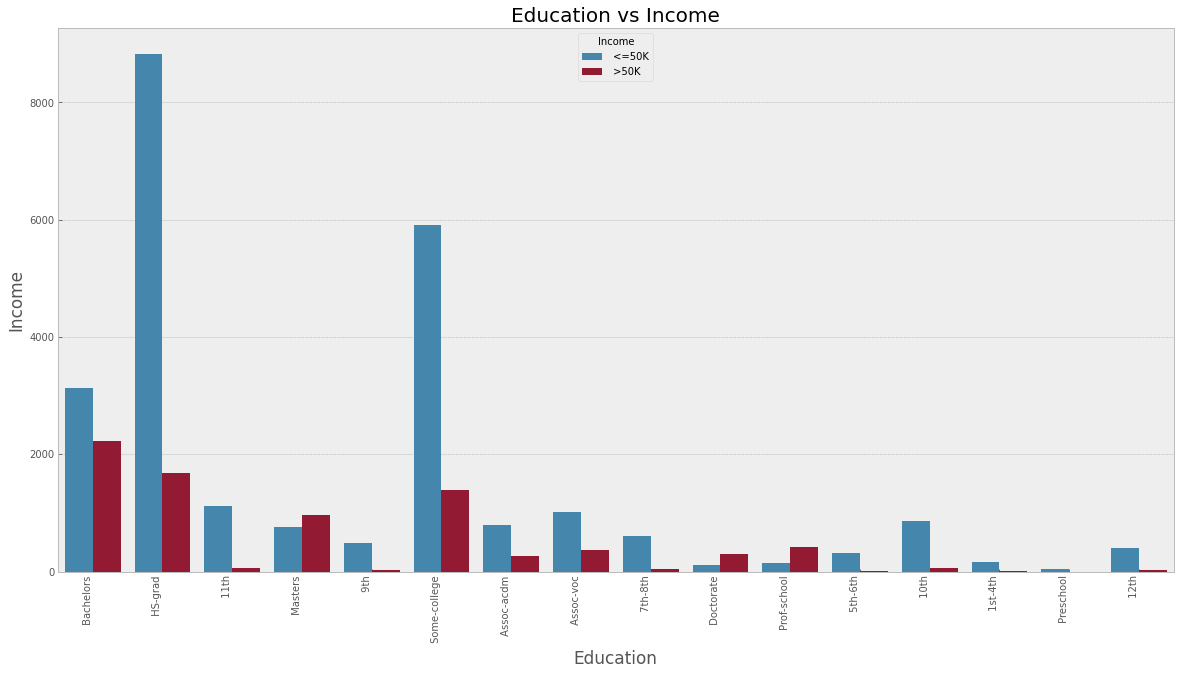

In [24]:
# Visualizing Education vs Income using count plot.


plt.figure(figsize=(20,10))
plt.title('Education vs Income',fontdict={'fontsize': 20})
plt.xticks(rotation=90,ha='right')
sns.countplot(x ='Education', hue = "Income", data = data)
plt.xlabel('Education', fontdict={'fontsize': 17})
plt.ylabel('Income', fontdict={'fontsize':17})
plt.show()

Education column with type HS-grad with male is maximum and least for preschool.

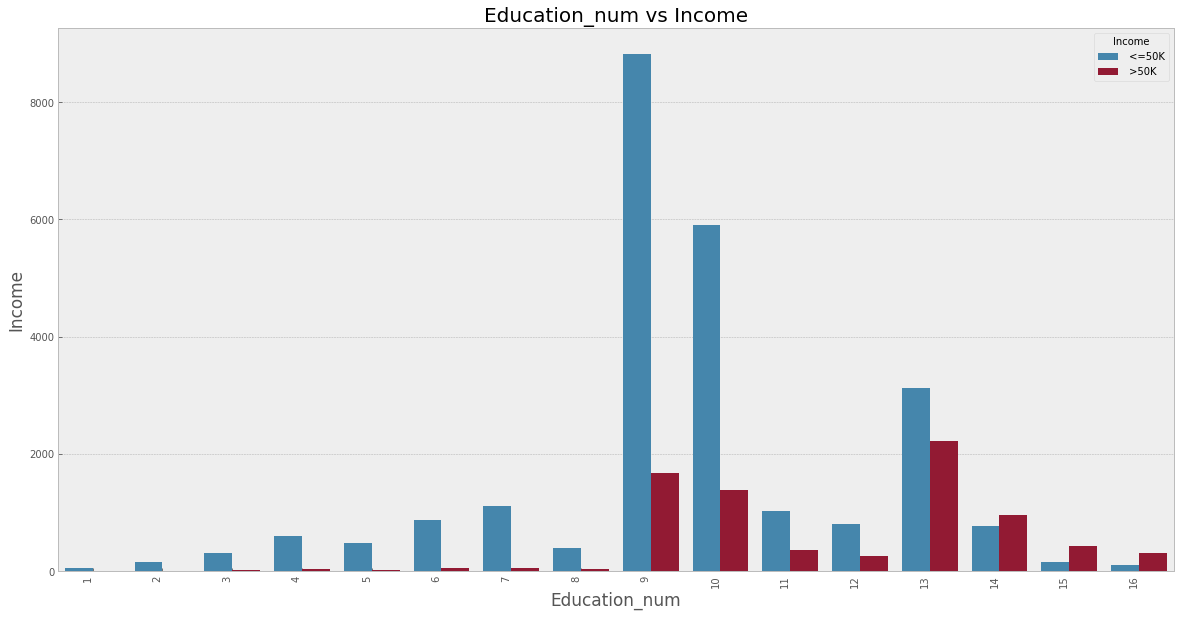

In [25]:
# Visualizing Education_num vs Income using count plot.

plt.figure(figsize=(20,10))
plt.title('Education_num vs Income',fontdict={'fontsize': 20})
plt.xticks(rotation=90,ha='right')
sns.countplot(x ='Education_num', hue = "Income", data = data)
plt.xlabel('Education_num', fontdict={'fontsize': 17})
plt.ylabel('Income', fontdict={'fontsize':17})
plt.show()

Most no. of years of Education has 9 as maximum years where Income is highest.

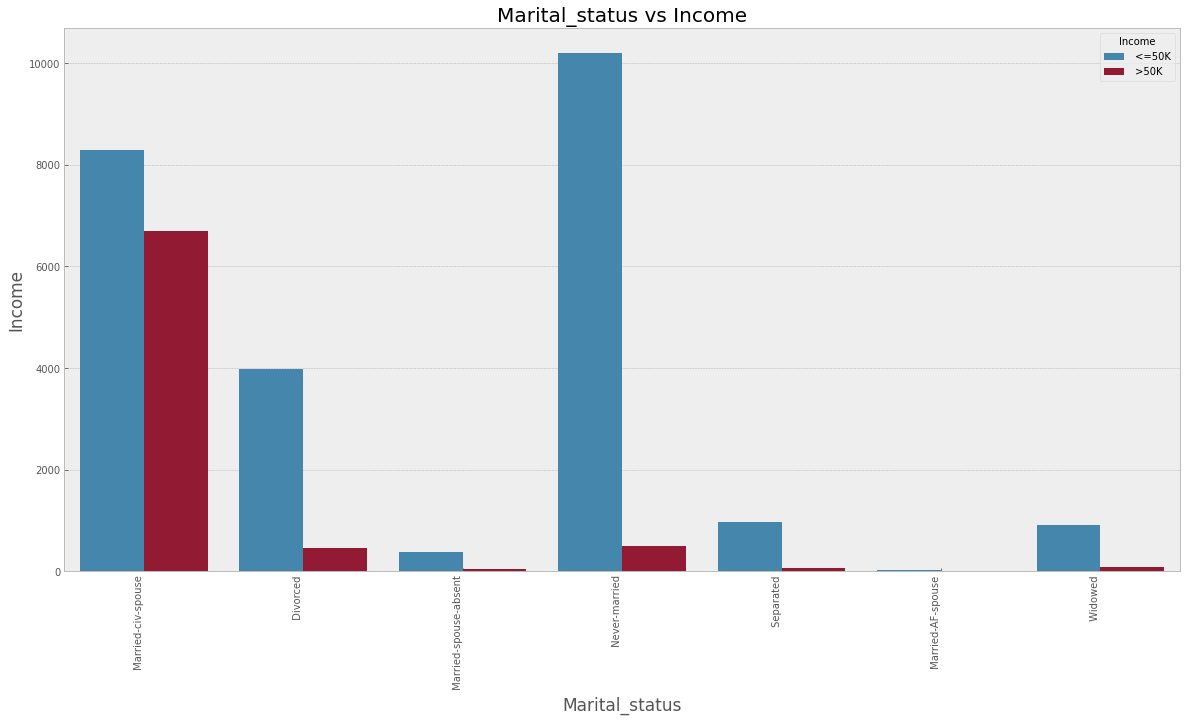

In [26]:
# Visualizing Marital_status vs Income using count plot.

plt.figure(figsize=(20,10))
plt.title('Marital_status vs Income',fontdict={'fontsize': 20})
plt.xticks(rotation=90,ha='right')
sns.countplot(x ='Marital_status', hue = "Income", data = data)
plt.xlabel('Marital_status', fontdict={'fontsize': 17})
plt.ylabel('Income', fontdict={'fontsize':17})
plt.show()

The male with never-married type of column marital status have highest income and female has lowest income,Whereas Married-AF-spouse type of marital status has almost zero income.

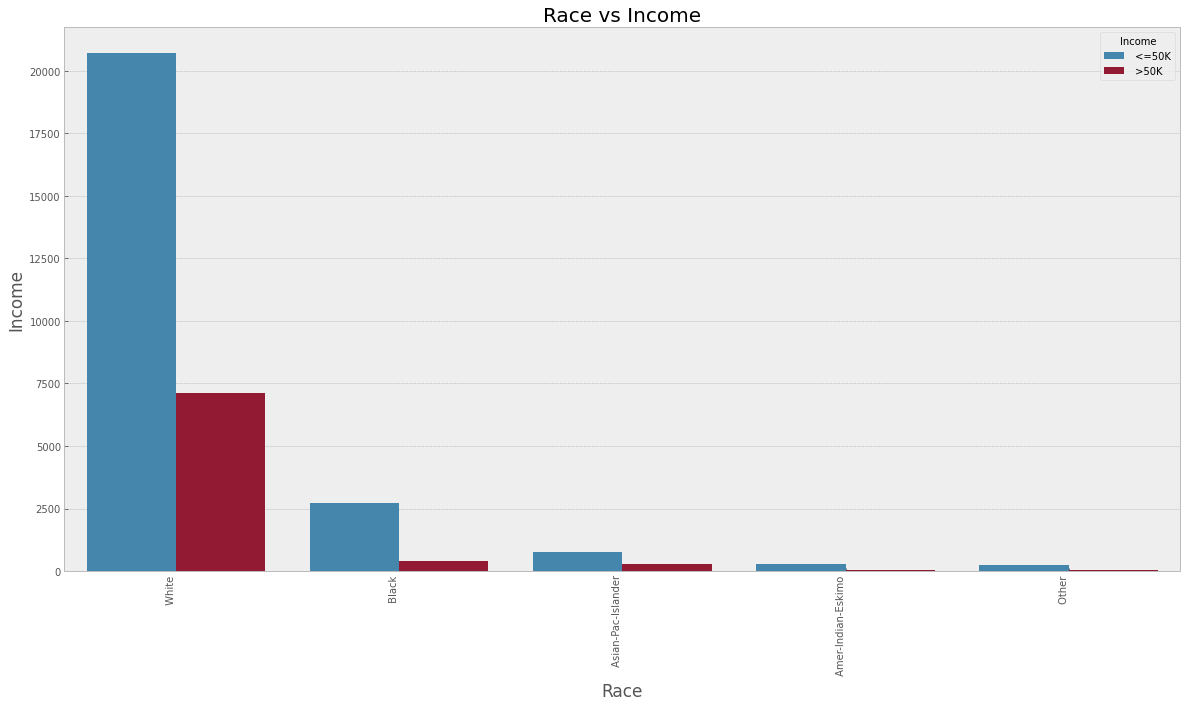

In [27]:
# Visualizing Race vs Income using count plot.


plt.figure(figsize=(20,10))
plt.title('Race vs Income',fontdict={'fontsize': 20})
plt.xticks(rotation=90,ha='right')
sns.countplot(x ='Race', hue = "Income", data = data)
plt.xlabel('Race', fontdict={'fontsize': 17})
plt.ylabel('Income', fontdict={'fontsize':17})
plt.show()

Maximum no. of male and female are included in white type of Race column have maximum income whereas other type has almost zero income

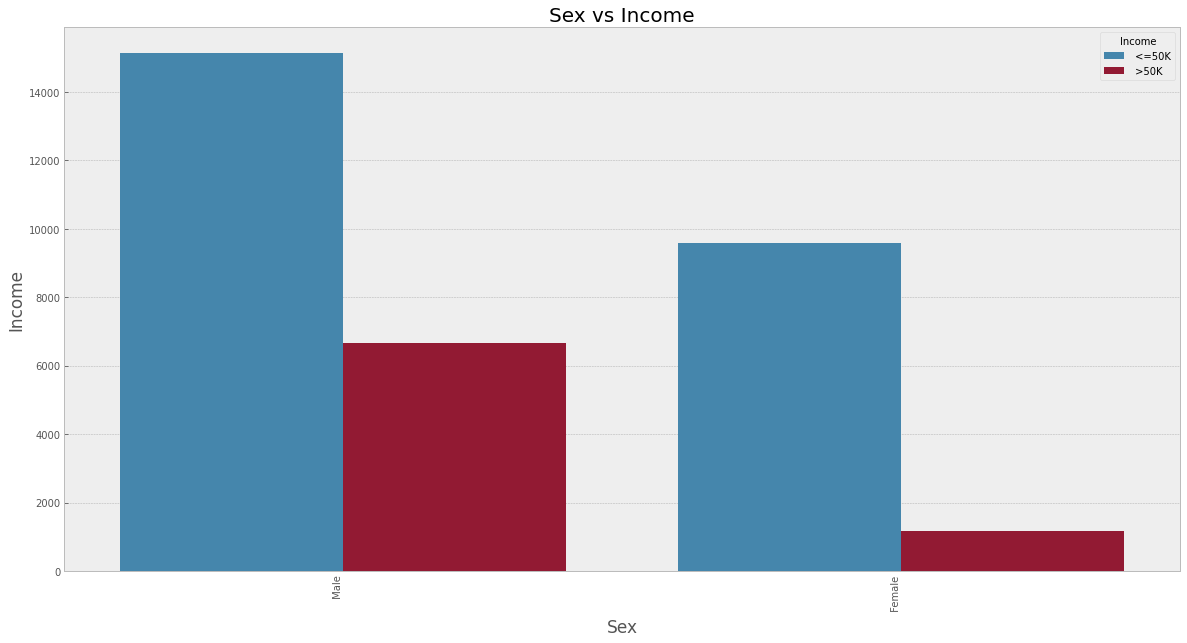

In [28]:
# Visualizing Sex vs Income using count plot.


plt.figure(figsize=(20,10))
plt.title('Sex vs Income',fontdict={'fontsize': 20})
plt.xticks(rotation=90,ha='right')
sns.countplot(x ='Sex', hue = "Income", data = data)
plt.xlabel('Sex', fontdict={'fontsize': 17})
plt.ylabel('Income', fontdict={'fontsize':17})
plt.show()

Maximum no. of males have highest income and female have lowest income.

In [29]:
# Separating the numerical features to check normalization in data

numerical=data[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]

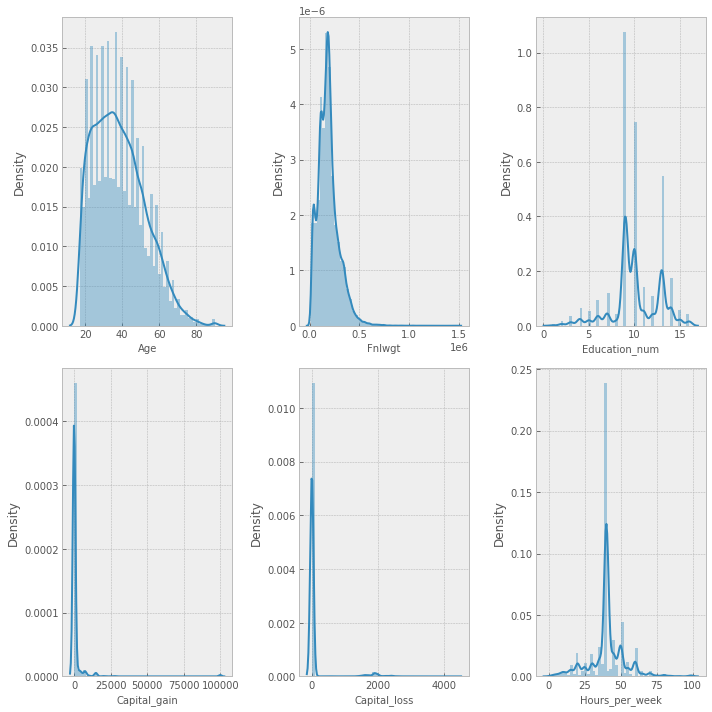

In [30]:
# Visualizing numerical features using dist plot.

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Here from the above dist plot we can see that our data is not normally distributed.

## **Multivariate Analysis**

<Figure size 2880x4320 with 0 Axes>

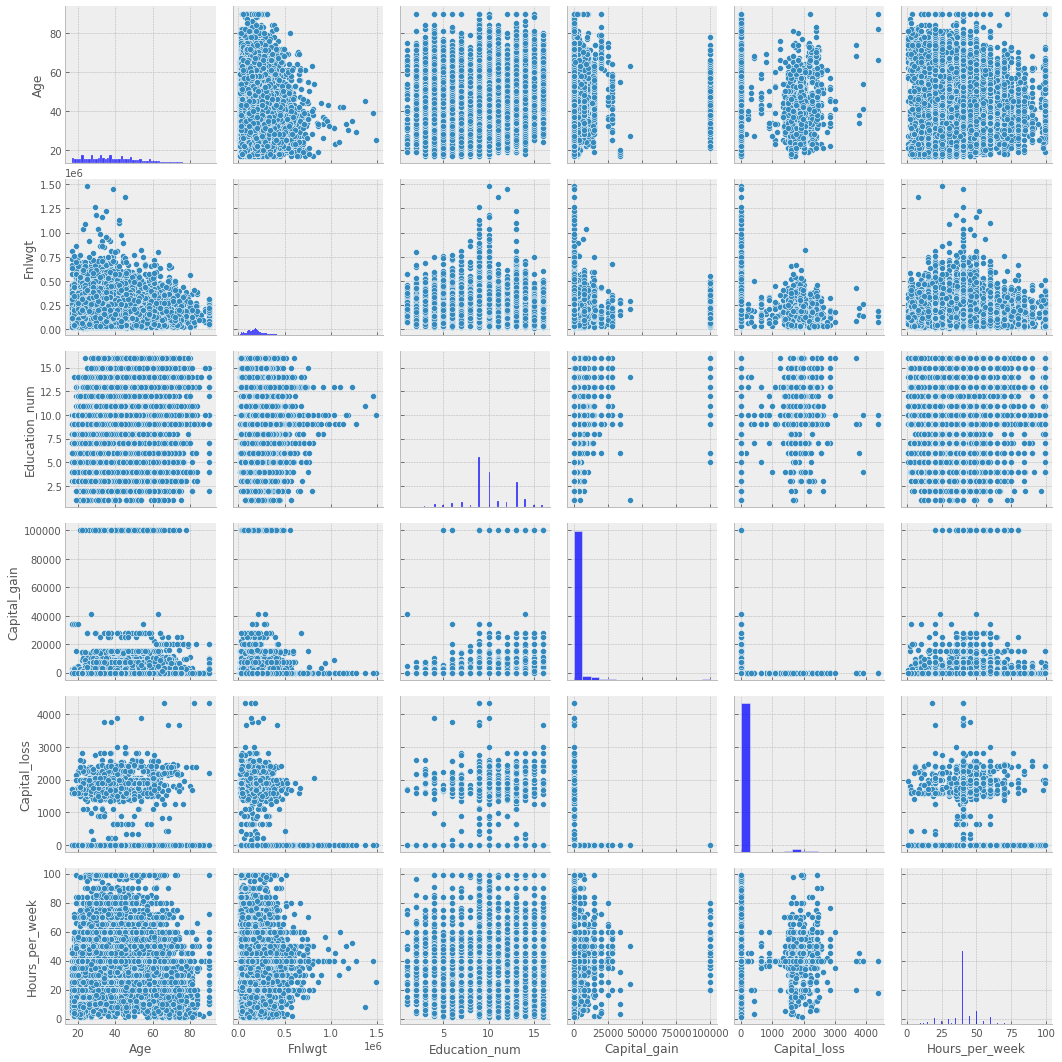

In [31]:
# Multivariate Analysis using pairplot.

plt.figure(figsize=(40,60))
sns.pairplot(data)
plt.show()

From the above pairplot, we cant see any linear relationship between features.

In [32]:
# Label Encoding for Income column.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
# Label Encoding for Income column.

data['Income'] = le.fit_transform(data['Income'])

**Checking the Correlation**

In [34]:
data.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


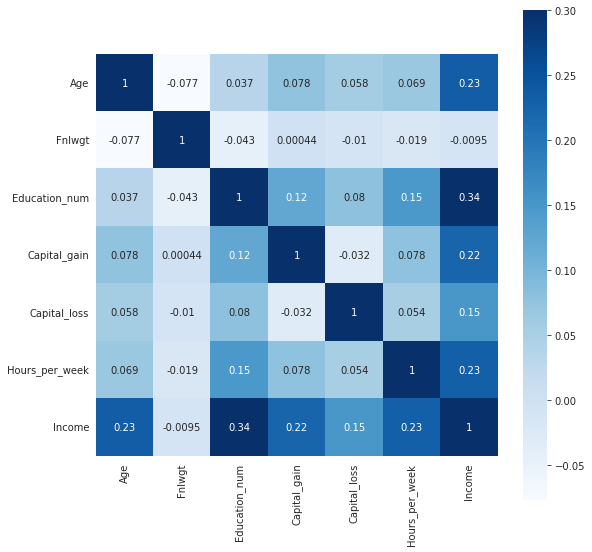

In [35]:
# Visualizing the correlation using heatmap.

data.corr()
mask = np.zeros_like(data.corr())
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9,9))
    ax = sns.heatmap(data.corr(), mask=mask, vmax=.3, square=True,
                     annot=True, cmap='Blues')
plt.show()

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

In [38]:
# Replacing the '?' with nan.

data = data.replace('?', np.nan)

In [37]:
# Checking null values

round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
dtype: object

In [39]:
# Separating the Occupation column for mode computation.

columns_with_nan = ['Occupation']

In [40]:
# Mode imputation

for col in columns_with_nan:
    data[col].fillna(data[col].mode()[0], inplace=True)

**Label Encoding**

In [41]:
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
    if data[col].dtypes == 'object':
        la = LabelEncoder()
        data[col] = la.fit_transform(data[col])

In [42]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


We successfully encoded the categorical columns.

**Outlier Detection and Handling**

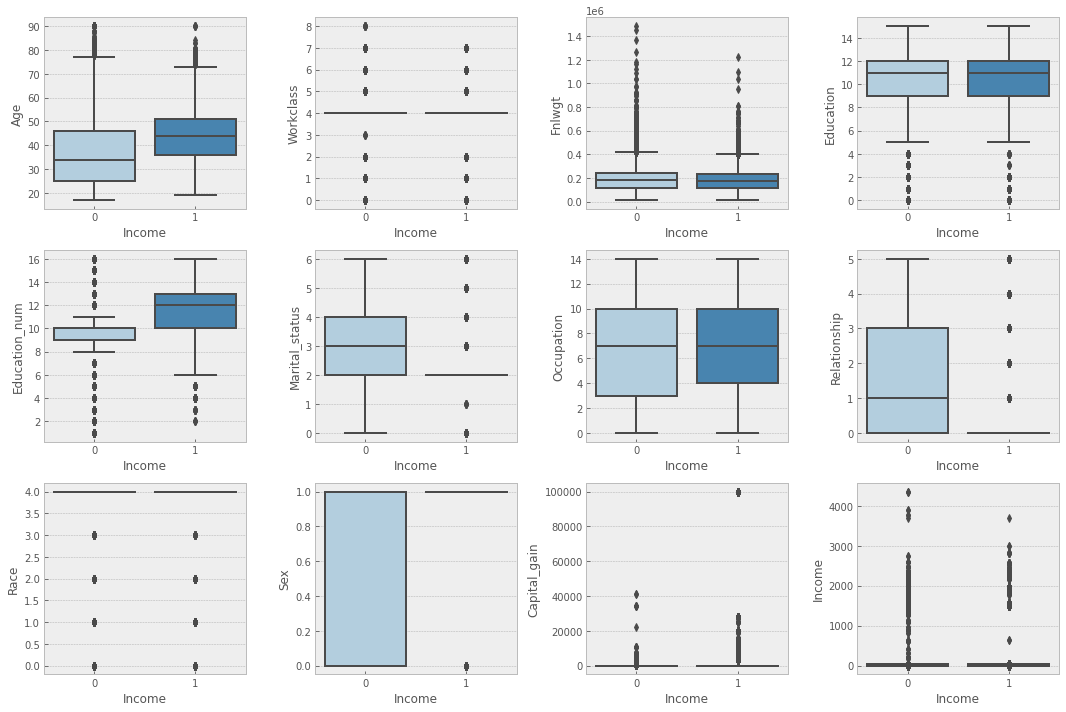

In [43]:
# Checking the outliers using boxplot.

fig, axes = plt.subplots(3,4, figsize=[15,10])
sns.boxplot(x='Income', y ='Age', data=data, ax=axes[0][0],palette="Blues")
sns.boxplot(x='Income', y ='Workclass', data=data, ax=axes[0][1],palette="Blues")
sns.boxplot(x='Income', y ='Fnlwgt', data=data, ax=axes[0][2],palette="Blues")
sns.boxplot(x='Income', y ='Education', data=data, ax=axes[0][3],palette="Blues")
sns.boxplot(x='Income', y ='Education_num', data=data, ax=axes[1][0],palette="Blues")
sns.boxplot(x='Income', y ='Marital_status', data=data, ax=axes[1][1],palette="Blues")
sns.boxplot(x='Income', y ='Occupation', data=data, ax=axes[1][2],palette="Blues")
sns.boxplot(x='Income', y ='Relationship', data=data, ax=axes[1][3],palette="Blues")
sns.boxplot(x='Income', y ='Race', data=data, ax=axes[2][0],palette="Blues")
sns.boxplot(x='Income', y ='Sex', data=data, ax=axes[2][1],palette="Blues")
sns.boxplot(x='Income', y ='Capital_gain', data=data, ax=axes[2][2],palette="Blues")
sns.boxplot(x='Income', y ='Capital_loss', data=data, ax=axes[2][3],palette="Blues")
sns.boxplot(x='Income', y ='Native_country', data=data, ax=axes[2][3],palette="Blues")
sns.boxplot(x='Income', y ='Income', data=data, ax=axes[2][3],palette="Blues")


plt.tight_layout()

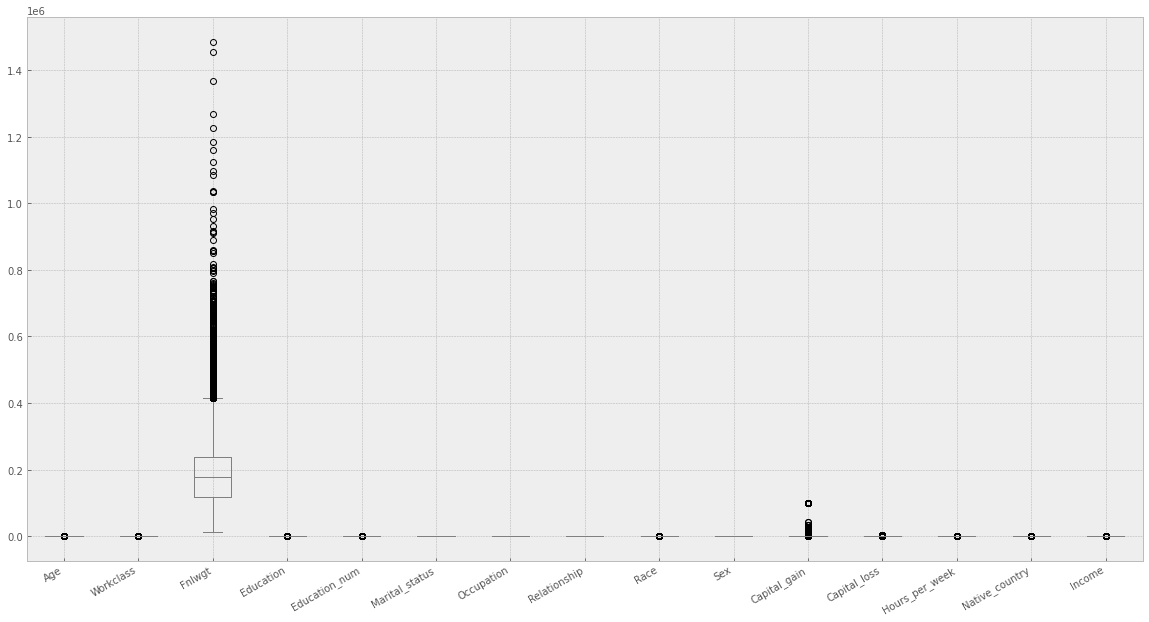

In [44]:
# Again visualizing columns using boxplot to detect outliers.

data.plot(kind='box',fontsize=10,figsize=(20,10),color='grey')
plt.xticks(rotation=30,ha='right')
plt.show()

We can see outliers in Age,workclass,Fnlwgt,Education,Education_num,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country and Income.

In [45]:
# We will handle the outliers using zscore.
# Separating the features having outliers for handling outliers.

outliers=data[['Age','Workclass','Fnlwgt','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country','Income']]


In [46]:
# Outliers handling.

from scipy.stats import zscore
z=np.abs(zscore(outliers))
data_new=data[(z<3).all(axis=1)]
data_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0


We successfully removed the outliers from dataset.

In [47]:
# Separating the target and features columns.

x=data_new.drop('Income',axis=1)
y=data_new['Income']

In [48]:
# We will drop the irrelevent columns for model prediction.

x = x.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country'], axis=1)

In [49]:
# Checking the shape after dropping the columns.

x.shape

(27417, 8)

In [50]:
y.shape

(27417,)

**Checking skewness in dataset**

In [51]:
# Checking the skewness in dataset.

x.skew()

Age               0.483478
Fnlwgt            0.626221
Education_num    -0.143960
Marital_status   -0.044317
Occupation        0.131148
Relationship      0.750207
Capital_gain      4.934878
Hours_per_week   -0.358396
dtype: float64

We can see there is some skewness in data, highest skewness is in capital_loss column and we will remove it with Powertransformation.

In [52]:
# Separating the features having skewness.

skew=['Relationship','Capital_gain','Fnlwgt']

In [53]:
# Removing the skewness in dataset.

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [54]:
# Applying the power transformation(yeo-johnson method) to data.

x[skew] = scaler.fit_transform(x[skew].values)

In [55]:
# Checking the skewness after skewness handeling.

x.skew().sort_values()

Hours_per_week   -0.358396
Education_num    -0.143960
Marital_status   -0.044317
Fnlwgt           -0.035195
Relationship      0.108587
Occupation        0.131148
Age               0.483478
Capital_gain      3.069625
dtype: float64

We Succesfully removed skewness in dataset.

In [56]:
# Our data needs Standardization so we are Scaling the data using Standard Scaler.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Capital_gain,Hours_per_week
0,0.882739,-1.124653,1.221891,-0.403219,-0.599291,-1.108479,-0.297044,-2.412190
1,-0.011737,0.413023,-0.438259,-1.718982,-0.128090,0.103606,-0.297044,0.008200
2,1.106358,0.593127,-1.268334,-0.403219,-0.128090,-1.108479,-0.297044,0.008200
3,-0.086276,1.035003,1.636928,-0.403219,-0.599291,1.549009,-0.297044,0.008200
4,0.808199,-0.156343,-2.098409,0.254663,0.343110,0.103606,-0.297044,-2.143257
...,...,...,...,...,...,...,...,...
27412,-0.831673,0.798010,0.806853,-0.403219,1.521110,1.549009,-0.297044,-0.171088
27413,0.137342,-0.220853,-0.438259,-0.403219,0.107510,-1.108479,-0.297044,0.008200
27414,1.479056,-0.248527,-0.438259,2.228308,-1.306091,1.342986,-0.297044,0.008200
27415,-1.204371,0.274676,-0.438259,0.912545,-1.306091,1.073858,-0.297044,-1.784681


We susscesfully standardize the dataset.

In [57]:
# Checking the VIF factor again begore modep prediction.

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.197080,Age
1,1.006622,Fnlwgt
2,1.048769,Education_num
3,1.154304,Marital_status
4,1.020518,Occupation
5,1.258396,Relationship
6,1.030893,Capital_gain
7,1.133350,Hours_per_week


There is no multicollinearity present in dataset,we can proceed further

As we can see our dataset is imbalanced,we have to balance it for model evaluation and prediction.

In [58]:
# Checking the distribution of dataset.

round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    77.61 %
1    22.39 %
Name: Income, dtype: object

We will use RandomOverSampler method for balancing the dataset.

In [60]:
# Importing RandomOverSampler

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=41)

In [61]:
# Fitting the dataset to over_sampling.

ros.fit(x, y)

RandomOverSampler(random_state=41)

In [62]:
# Getting the new dataset samples.

x_resampled, y_resampled = ros.fit_resample(x, y)

In [63]:
# Checking whether the dataset is balanced or not again after applyning RandomOverSampler.

round(y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'


0    50.0 %
1    50.0 %
Name: Income, dtype: object

We finally got the balanced dataset, so we can now move onwards.

## **Splitting the dataset into train and test**

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Finding the best random state.
maxAccu=0
maxRS=0

for i in range(0,100):
    x_train,x_test, y_train, y_test=train_test_split(x_resampled,y_resampled,test_size=.20, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.9413768796992481  on Random_state  29


We got the best random_state as 29 and we will proceed with that.

In [84]:
from sklearn.model_selection import train_test_split
  
x_train, x_test, y_train, y_test = train_test_split(
  
   x, y, test_size = 0.2, random_state = 29)

In [86]:
# Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Logistic** **Regression**

In [87]:
# Logistic Regression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_lr)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy: 82.33041575492341
[[3999  256]
 [ 713  516]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4255
           1       0.67      0.42      0.52      1229

    accuracy                           0.82      5484
   macro avg       0.76      0.68      0.70      5484
weighted avg       0.81      0.82      0.81      5484



**Random Forest Classifier**

In [88]:
# Applying RandomForest Classifier for model building and evaluation. 

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_rf)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy: 84.73741794310722
[[3959  296]
 [ 541  688]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4255
           1       0.70      0.56      0.62      1229

    accuracy                           0.85      5484
   macro avg       0.79      0.75      0.76      5484
weighted avg       0.84      0.85      0.84      5484



**Decision Tree Classifier**

In [90]:
# Applying DecisionTree Classifier for model building and evaluation. 

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_dt)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy: 80.59810357403356
[[3736  519]
 [ 545  684]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4255
           1       0.57      0.56      0.56      1229

    accuracy                           0.81      5484
   macro avg       0.72      0.72      0.72      5484
weighted avg       0.80      0.81      0.81      5484



**Support Vector Classifier**

In [91]:
# Support Vector Classifier 

svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_svc)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy: 83.73450036469731
[[4016  239]
 [ 653  576]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4255
           1       0.71      0.47      0.56      1229

    accuracy                           0.84      5484
   macro avg       0.78      0.71      0.73      5484
weighted avg       0.83      0.84      0.82      5484



**KNeighbors Classifier**

In [92]:
# Applying KNeighbors Classifier for model building and evaluation. 

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_knn)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))


Accuracy: 82.87746170678338
[[3854  401]
 [ 538  691]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4255
           1       0.63      0.56      0.60      1229

    accuracy                           0.83      5484
   macro avg       0.76      0.73      0.74      5484
weighted avg       0.82      0.83      0.83      5484



**Extra Trees Classifier**

In [94]:
# Applying KNeighbors Classifier for model building and evaluation. 


from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
pred_ex=ex.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_ex)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_ex))
print(classification_report(y_test,pred_ex))


Accuracy: 83.6797957695113
[[3899  356]
 [ 539  690]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4255
           1       0.66      0.56      0.61      1229

    accuracy                           0.84      5484
   macro avg       0.77      0.74      0.75      5484
weighted avg       0.83      0.84      0.83      5484



# **`Cross Validation for each model`**

In [95]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lr,x,y,cv=5)
print('Cross_validation_score for LogisticRegression is:',cvs.mean())

Cross_validation_score for LogisticRegression is: 0.8288289126007541


In [100]:
cvs=cross_val_score(rf,x,y,cv=5)
print('Cross_validation_score for RandomForest is:',cvs.mean())

Cross_validation_score for RandomForest is: 0.8498377053775259


In [102]:
cvs=cross_val_score(dt,x,y,cv=5)
print('Cross_validation_score for Decision tree classifier is:',cvs.mean())

Cross_validation_score for Decision tree classifier is: 0.8061787159116441


In [103]:
cvs=cross_val_score(svc,x,y,cv=5)
print('Cross_validation_score for SVC is:',cvs.mean())

Cross_validation_score for SVC is: 0.8399899137882985


In [104]:
cvs=cross_val_score(knn,x,y,cv=5)
print('Cross_validation_score for KNeighborsClassifier is:',cvs.mean())

Cross_validation_score for KNeighborsClassifier is: 0.825364048787892


In [101]:
cvs=cross_val_score(ex,x,y,cv=5)
print('Cross_validation_score for ExtraTreesClassifier is:',cvs.mean())

Cross_validation_score for ExtraTreesClassifier is: 0.8400628399457085


**Reason For Selecting Random Forest Classifier**

Here From above we observed that Random Forest classifier model performs very well as compared to all other models as the difference between Random Forest classifier's accuracy score and cross validation is very less that it is negligible difference and thats why we are concluding that Random Forest classifier is the fit model for our dataset,Now we will do Hyperparameter tunning to improve this score.

# **Hyper Parameter Tunning**

In [114]:
# Hyper Parameter tunning using RandomisedSearchCV.

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(10,100,10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [115]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90]},
                   random_state=42, verbose=2)

In [117]:
# Finding the best parameters.

rf_random.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 70}

In [119]:
# Predicting final model with best parameters.

Final_model=RandomForestClassifier(bootstrap=True,max_depth=70,max_features='auto',min_samples_split=2,min_samples_leaf=4,n_estimators=70)

In [120]:
final_fit = Final_model.fit(x_train,y_train)

In [121]:
final_pred = Final_model.predict(x_test)

In [122]:
# Final model accuracy score.

accu_score = (accuracy_score(y_test, final_pred))*100    # checking accuracy score
print("The Accuracy Score for the Best Model is ", accu_score)

The Accuracy Score for the Best Model is  85.77680525164114


In [125]:
# Final model Cross Validation Score

final_cv_score = (cross_val_score(Final_model, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 86.0159936029313


In [126]:
# Final model Classification Report and confusion matrix.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(confusion_matrix(y_test,final_pred))
final_class_report = classification_report(y_test, final_pred)
print("\nClassification Report:\n", final_class_report)

[[4026  229]
 [ 551  678]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4255
           1       0.75      0.55      0.63      1229

    accuracy                           0.86      5484
   macro avg       0.81      0.75      0.77      5484
weighted avg       0.85      0.86      0.85      5484



# **Saving the model**

In [127]:
import pickle
filename = 'Census_Income_Project.pkl'
pickle.dump(Final_model, open(filename, 'wb'))